In [1]:
import numpy as np, scipy.fftpack as fft, matplotlib.pyplot as plt
from functions import discrete_conv_alt as conv, normalized_sinc as norm_sunc
from functions import discrete_conv as naive_conv
from scipy.integrate import simpson
from numba import guvectorize, vectorize, float32, float64, int64, njit, generated_jit, types

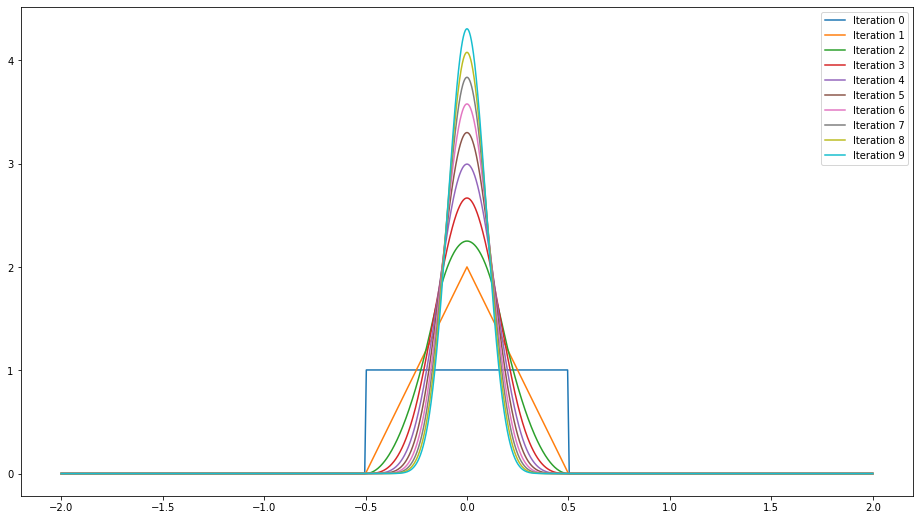

In [3]:
x = np.linspace(-2,2, 501)
dirac = np.where(np.abs(x) < .5, 1, 0)

convolution = np.copy(dirac)
plt.figure(figsize=(16,9))
for ii in range(10):
    plt.plot(x, convolution/simpson(convolution, x), '-', label=f"Iteration {ii}")
    convolution = conv(dirac, convolution)
    x = np.linspace(*x[[0,-1]], convolution.size)

plt.legend()
plt.show()

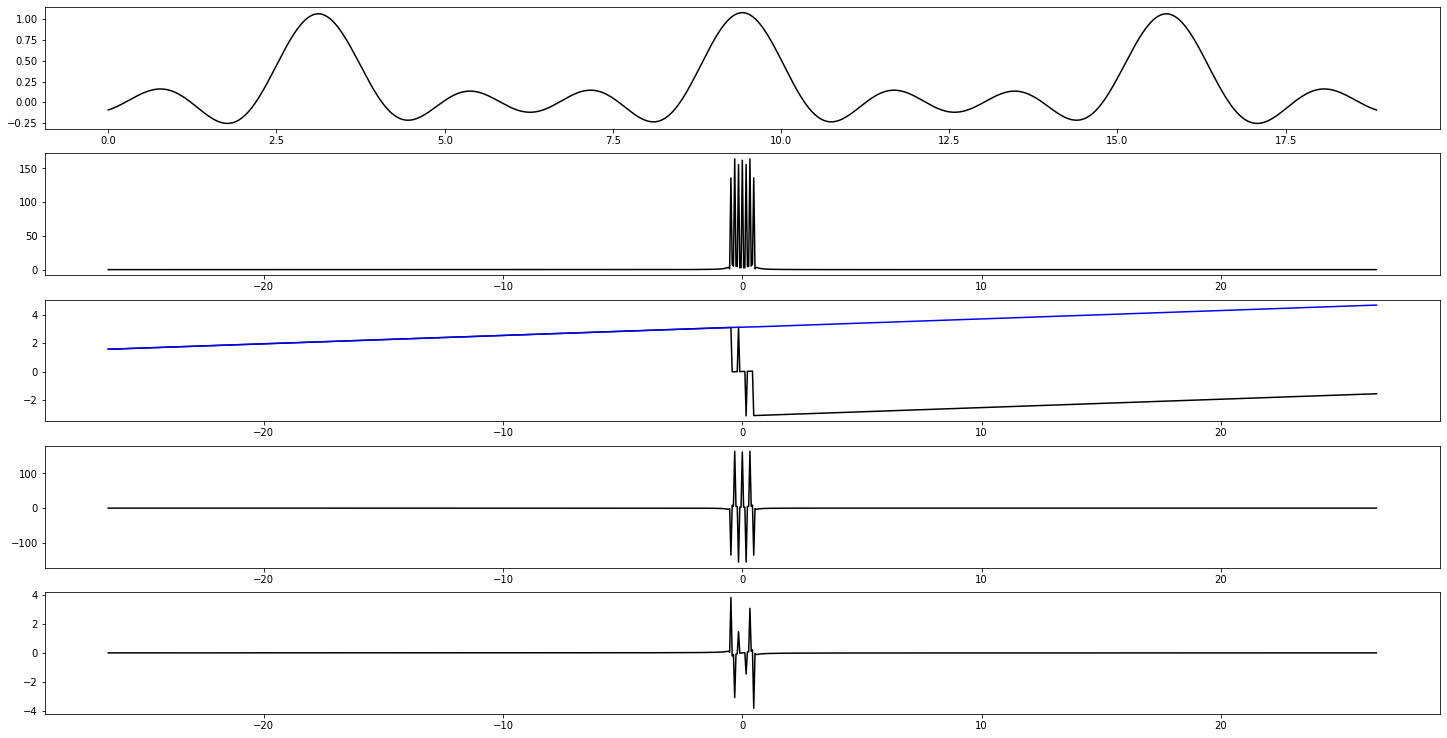

In [4]:
def unwrap_angles(angles, threshold=.5):
    unwrapped_angles = np.copy(angles)
    diffs = np.diff(angles)
    where_big = np.where(np.abs(diffs) > threshold)[0]

    for index in where_big:
        unwrapped_angles[index + 1: ] -= diffs[index]

    return unwrapped_angles

def angle_grinder(angles, sample_spacing=1):
    unwrapped_angles = np.copy(angles)
    derivative = np.gradient(angles, sample_spacing)
    where_big = np.where(np.abs(derivative) > np.mean(np.abs(derivative)))[0]

    for index in where_big:
        unwrapped_angles[index + 1: ] -= derivative[index]*sample_spacing

    return derivative

# @vectorize#([float32(float32), float64(float64)])
# def normalized_sinc(x):
    # return 1 if x == 0 else np.sin(np.pi*x)/(np.pi*x)

fundamental_freq = 2*np.pi
t = np.linspace(0, 3*fundamental_freq, 1001)
# frequencies = np.random.choice(np.arange(0, 5, .5), 4)
# print(np.sort(frequencies))
times = np.array([t-np.pi, t-3*np.pi, t-5*np.pi])
sinusoid = norm_sunc(times).sum(axis=0)
# sinusoid = np.sum([np.sin(fundamental_freq*ii*t) + np.cos(fundamental_freq*ii*t) for ii in frequencies], axis=0)
# sinusoid = np.sin(5*fundamental_freq*t)*np.exp(-(t-3*np.pi)**2)
# sinusoid += np.random.normal(0, .1, sinusoid.size)

frequency_amplitude = fft.fftshift(fft.fft(sinusoid))
frequency_spectrum = fft.fftshift(fft.fftfreq(t.size, d=t[1]-t[0]))

radii = np.abs(frequency_amplitude)
phases = np.angle(frequency_amplitude)
unwrapped_phases = unwrap_angles(phases, 3)

fig, ax = plt.subplots(5, figsize=(25,13))
ax[0].plot(t, sinusoid, 'k-')
ax[1].plot(frequency_spectrum, radii, 'k-')
ax[2].plot(frequency_spectrum, phases, 'k-')
ax[2].plot(frequency_spectrum, unwrapped_phases, 'b-')
ax[3].plot(frequency_spectrum, frequency_amplitude.real, 'k-')
ax[4].plot(frequency_spectrum, frequency_amplitude.imag, 'k-')

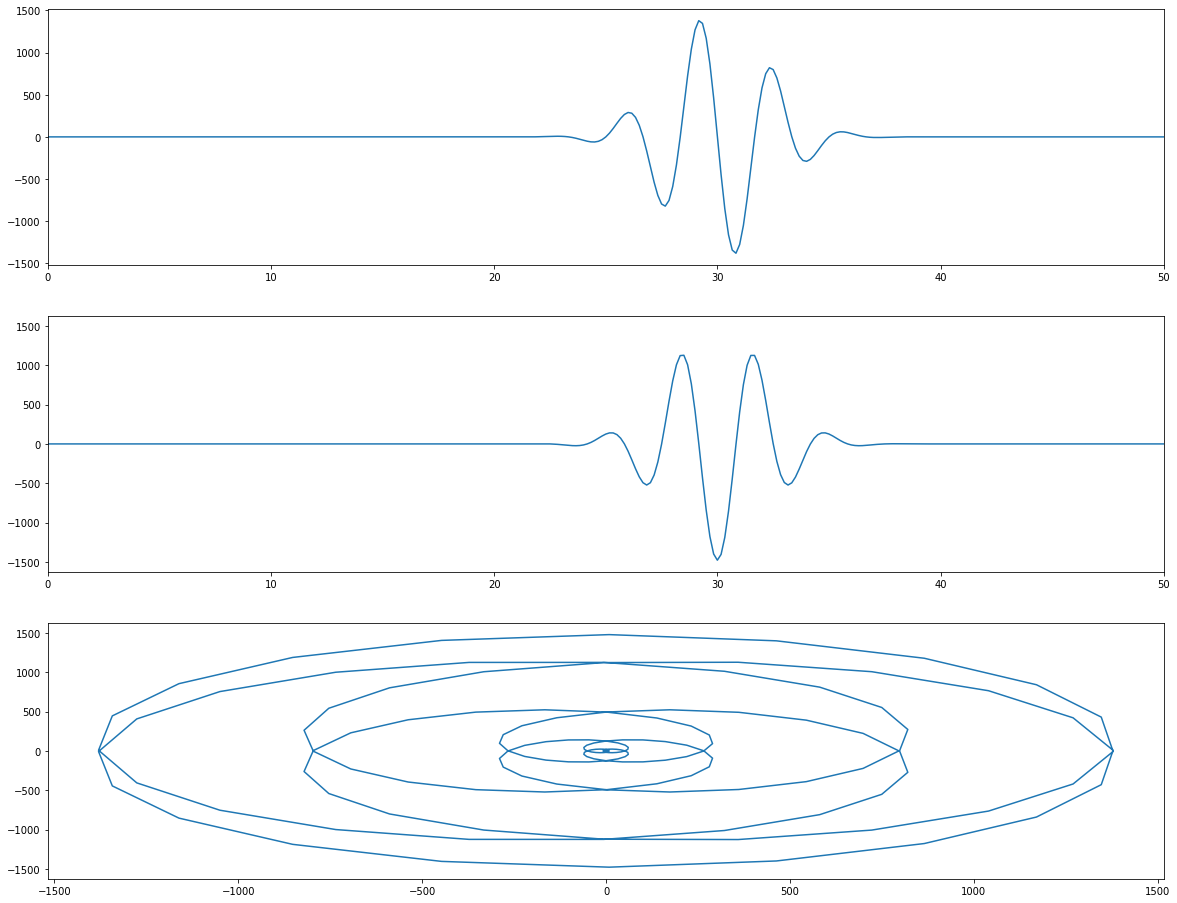

In [5]:
tau = np.linspace(-3,3,10001)
signal = np.sin(3*fundamental_freq*tau)*np.exp(-tau*tau)

fourier = fft.fft(signal, 10*tau.size)
fourier_shift = fft.fftshift(fourier)
freqs = fft.fftshift(fft.fftfreq(fourier.size, 1e-1*(tau[1] - tau[0])))

fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(20,16))

ax1.plot(freqs, fourier_shift.real)
ax1.set_xlim(0, 50)
ax2.plot(freqs, fourier_shift.imag)
ax2.set_xlim(0, 50)
ax3.plot(fourier_shift.real, fourier_shift.imag)

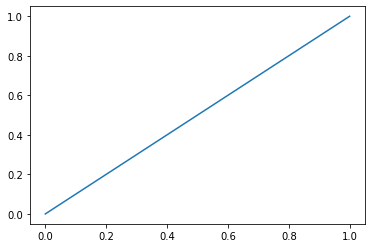

In [6]:
a = np.linspace(0, 1+1j, 101)

plt.plot(a.real, a.imag)

In [7]:
a = np.sqrt(np.exp(-np.log(2)))
for i in range(100):
    a = a**np.sqrt(np.exp(-np.log(2)))

print(a)

0.9999999999999997


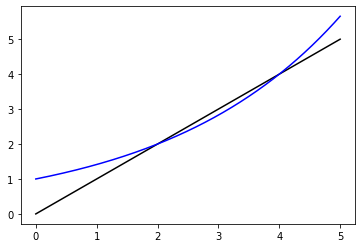

In [8]:
x = np.linspace(0, 5, 10001)
y = np.power(np.sqrt(2), x)

plt.plot(x,x, 'k-')
plt.plot(x,y, 'b-')

In [9]:

x0 = 3
advance = lambda x: np.power(np.sqrt(2), x)
x_next = x0
for ii in range(100):
    print(x_next)
    x_next = advance(x_next)

3
2.8284271247461907
2.6651441426902265
2.5185128140150885
2.393723319824126
2.292404542149578
2.2133049978163952
2.1534539887369064
2.1092454573462365
2.0771749448529166
2.05421540764181
2.037934528741221
2.0264678180071445
2.0184304960923667
2.012815933865573
2.008903086047553
2.006180679562022
2.0042887123126967
2.002974919192235
2.0020631202355337
2.001430557354164
2.000991832648391
2.000687604176611
2.0004766676903576
2.0003304281583216
2.0002290484611165
2.0001587705967268
2.00011005441936
2.000076285365315
2.0000528776848863
2.0000366523540385
2.0000254056372233
2.0000176099233387
2.0000122063059607
2.000008460784458
2.0000058645774907
2.000004065019484
2.0000028176587796
2.000001953053193
2.0000013537537726
2.0000009383508313
2.000000650415339
2.0000004508336096
2.00000031249407
2.0000002166043958
2.000000150138732
2.000000104068242
2.0000000721346103
2.0000000499999024
2.000000034657292
2.000000024022605
2.0000000166512013
2.0000000115417333
2.00000000800012
2.000000005545261


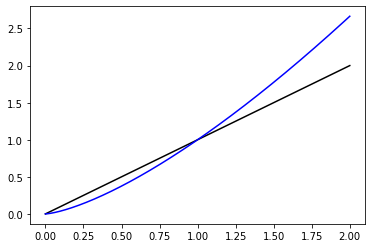

In [10]:

x = np.linspace(0, 2, 10001)
y = np.power(x, np.sqrt(2))

plt.plot(x,x, 'k-')
plt.plot(x,y, 'b-')

In [11]:
x0 = 3.
advance = lambda x: np.power(x, np.sqrt(2))
x_next = x0
for ii in range(100):
    print(x_next)
    x_next = advance(x_next)

3.0
4.728804387837416
9.000000000000004
22.361590938430407
81.00000000000011
500.04074929769325
6561.0000000000255
250040.7509581989
43046721.00000044
62520377139.74027
1853020188851887.8
3.9087975576953846e+21
3.433683820292719e+30
1.5278698347045611e+43
1.1790184577740228e+61
2.3343862318002066e+86
1.3900845237718888e+122
5.449359079218664e+172
1.9323349832302672e+244
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


C:\Users\josep\AppData\Local\Temp/ipykernel_8976/1029108243.py:2: RuntimeWarning: overflow encountered in power
  advance = lambda x: np.power(x, np.sqrt(2))


In [12]:

@vectorize([float32(float32), float64(float64)])
def blah(x):
    return 1 if x == 0 else np.sin(np.pi*x)/(np.pi*x)

%timeit blah(t)
%timeit np.where(t == 0, 1, np.sin(np.pi*t)/(np.pi*t))

8.82 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<magic-timeit>:1: RuntimeWarning: invalid value encountered in true_divide


18.9 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
@guvectorize([(int64[:], int64, int64[:]), (float64[:], float64, float64[:])], '(n),()->(n)')
def g(x, y, res):
    for i in range(x.shape[0]):
        res[i] = x[i] + y

a = np.arange(2*6, dtype=np.float64).reshape(2, 2, 3)

a, g(a, 10), g(a, np.array([10, 20]))

(array([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],
 
        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]]),
 array([[[10., 11., 12.],
         [13., 14., 15.]],
 
        [[16., 17., 18.],
         [19., 20., 21.]]]),
 array([[[10., 11., 12.],
         [23., 24., 25.]],
 
        [[16., 17., 18.],
         [29., 30., 31.]]]))

In [52]:
def factorial(n):
    if n < 2:
        return 1
    else:
        return n*factorial(n-1)

jittorial = njit(["uint32(uint32)", "uint64(uint64)"])(factorial)
q = np.uint64(10)
jittorial(q)

q = np.uint64(35)
%timeit factorial(q)
%timeit jittorial(q)

28.2 µs ± 783 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
349 ns ± 9.18 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [2]:
(f:=lambda x: 1 if x == 0 else x*f(x - 1))

@generated_jit(nopython=True)
def factorial(x):
    if isinstance(x, types.Integer):
        @njit
        def fact(x):
            if x < 2:
                return 1
            else:
                return x*fact(x-1)
        return lambda x: fact(x+1)# (f:=lambda x: 1 if x < 2 else x*f(x-1))
    elif isinstance(x, types.Float):
        return lambda x: x**2
    else:
        return lambda x: False

In [9]:
q = np.uint64(35)
factorial(np.uint64(q-30)), factorial(6.66), factorial("STR"), type(q), type(q-np.uint64(30))

(720,
 44.3556,
 False,
 numpy.uint64,
 numpy.uint64,
 <function __main__.<lambda>(x)>)

In [83]:
y = 1
print([y]+[y := y*2 for x in range(9)])

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


In [17]:
np.sinc()

True
True
0
